# COVID WORLD

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#reading the covid csv file
dc=pd.read_csv("covid.csv")
dc

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


In [3]:
#loading the fraction age data 
da=pd.read_csv("age.csv")
da

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185
...,...,...,...,...
208,St. Barth,NaN,NaN,NaN
209,Western Sahara,NaN,NaN,NaN
210,Anguilla,NaN,NaN,NaN
211,Lesotho,0.354,0.601,0.045


In [4]:
#info of dataset
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 6603 non-null   object 
 1   Country              6603 non-null   object 
 2   Population           6603 non-null   int64  
 3   Total Tests          5505 non-null   float64
 4   Total Cases          6554 non-null   float64
 5   Total Deaths         5367 non-null   float64
 6   Total Recovered      6318 non-null   float64
 7   Serious or Critical  4117 non-null   float64
 8   Active Cases         6544 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 464.4+ KB


In [5]:
#info of age fraction data
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   213 non-null    object 
 1   Fraction age 0-14 years   176 non-null    float64
 2   Fraction age 15-64 years  176 non-null    float64
 3   Fraction age 65+ years    176 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.8+ KB


In [6]:
#checking the null values
dc.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [7]:
#checking the value counts of data in column
for col in dc.columns:
    print(dc[col].value_counts())

2020-04-19    213
2020-05-03    213
2020-04-29    213
2020-05-01    213
2020-05-14    213
2020-05-18    213
2020-04-28    213
2020-04-30    213
2020-04-25    213
2020-05-07    213
2020-05-02    213
2020-04-18    213
2020-04-27    213
2020-05-16    213
2020-05-05    213
2020-04-23    213
2020-05-17    213
2020-05-10    213
2020-04-20    213
2020-05-11    213
2020-04-22    213
2020-04-21    213
2020-05-06    213
2020-04-24    213
2020-05-04    213
2020-05-15    213
2020-04-26    213
2020-05-12    213
2020-05-09    213
2020-05-13    213
2020-05-08    213
Name: Date, dtype: int64
Suriname              31
Armenia               31
Macao                 31
Angola                31
Anguilla              31
                      ..
Dominican Republic    31
Indonesia             31
Ireland               31
Gabon                 31
UK                    31
Name: Country, Length: 213, dtype: int64
16687100    31
26461313    31
84980       31
16364523    31
33409960    31
            ..
7121943    

In [8]:
#checking the date column to datetime format
dc['Date'] =  pd.to_datetime(dc['Date'],infer_datetime_format=True)

In [9]:
#statistics data
dc.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,6.603000e+03,5.505000e+03,6.554000e+03,5367.000000,6318.000000,4117.000000,6.544000e+03
mean,3.637913e+07,2.167252e+05,1.692968e+04,1416.252096,5855.424185,386.748360,9.964142e+03
std,1.411537e+08,7.595143e+05,8.861467e+04,6645.247810,23467.641235,1658.428324,6.541025e+04
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000,1.000000,0.000000e+00
25%,8.672680e+05,2.690000e+03,7.900000e+01,6.000000,26.000000,3.000000,2.600000e+01
50%,6.859926e+06,2.547800e+04,6.135000e+02,24.000000,219.000000,13.000000,2.720000e+02
75%,2.546422e+07,1.437810e+05,4.877500e+03,199.000000,1394.750000,89.000000,2.041000e+03
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06


__observations:__
   - maximum population-1.439324e+09
   - most number of death in country is- 91981.0
   - recovered people maximum in a day is 356383.0

In [10]:
#statistics data of age fraction
da.describe()

,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
count,176.000000,176.000000,176.000000
mean,0.276098,0.636109,0.087731
std,0.106748,0.066543,0.062522
min,0.115000,0.472000,0.011000
25%,0.177000,0.596750,0.034000
50%,0.266500,0.649000,0.063500
75%,0.368250,0.675250,0.143250
max,0.502000,0.850000,0.270000


- Most of the people belomg to age 15-64

In [11]:
#filling null values with zero 
dc=dc.fillna(0)

In [12]:
#checking null values
dc.isnull().sum()

Date                   0
Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
dtype: int64

In [13]:
#checking the null values of age fraction
da.isnull().sum()

Country                      0
Fraction age 0-14 years     37
Fraction age 15-64 years    37
Fraction age 65+ years      37
dtype: int64

In [14]:
#fill the null values with the mean
da['Fraction age 0-14 years']=da['Fraction age 0-14 years'].fillna(da['Fraction age 0-14 years'].mean())
da['Fraction age 15-64 years']=da['Fraction age 15-64 years'].fillna(da['Fraction age 15-64 years'].mean())
da['Fraction age 65+ years']=da['Fraction age 65+ years'].fillna(da['Fraction age 65+ years'].mean())

In [15]:
#checking again the null values 
da.isnull().sum()

Country                     0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
dtype: int64

In [16]:
#spiliting the date column to day
dc['date']=dc['Date'].dt.day

In [17]:
#spiliting the date column to month
dc['Month']=dc['Date'].dt.month

In [18]:
#checking the dataset
dc

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,date,Month
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,18,4
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0,18,4
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0,18,4
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0,18,4
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,0.0,1559.0,98409.0,18,4
...,...,...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,0.0,6.0,0.0,6.0,0.0,0.0,18,5
6599,2020-05-18,Western Sahara,595462,0.0,6.0,0.0,6.0,0.0,0.0,18,5
6600,2020-05-18,Anguilla,14987,0.0,3.0,0.0,3.0,0.0,0.0,18,5
6601,2020-05-18,Lesotho,2140235,0.0,1.0,0.0,0.0,0.0,1.0,18,5


# EDA

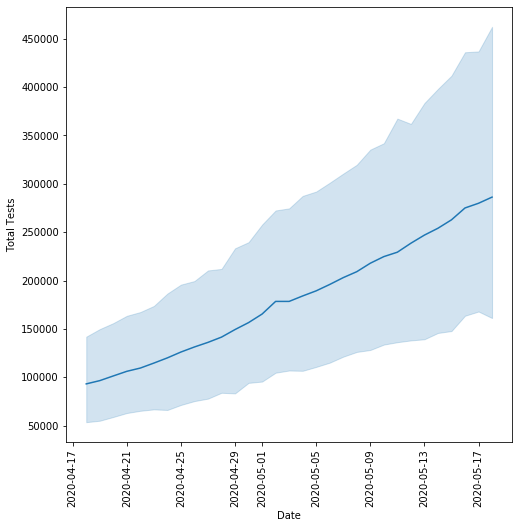

In [19]:
# plotting the graph to know the total test trend with increase in date
plt.figure(figsize=(8,8))
sns.lineplot(x="Date",y="Total Tests",data=dc)
plt.xticks(rotation=90)
plt.show()

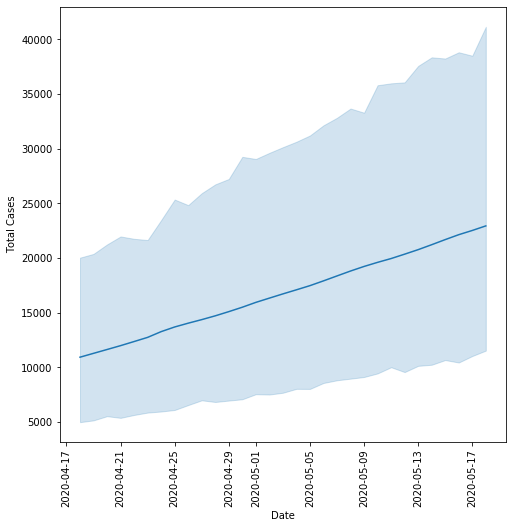

In [20]:
# plotting the graph to know the totalcase trend with increase in date
plt.figure(figsize=(8,8))
sns.lineplot(x="Date",y="Total Cases",data=dc)
plt.xticks(rotation=90)
plt.show()

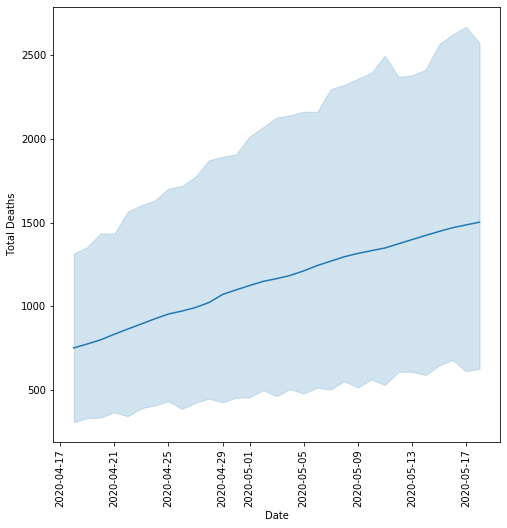

In [21]:
# plotting the graph to know the total Deaths trend with increase in date
plt.figure(figsize=(8,8))
sns.lineplot(x="Date",y="Total Deaths",data=dc)
plt.xticks(rotation=90)
plt.show()

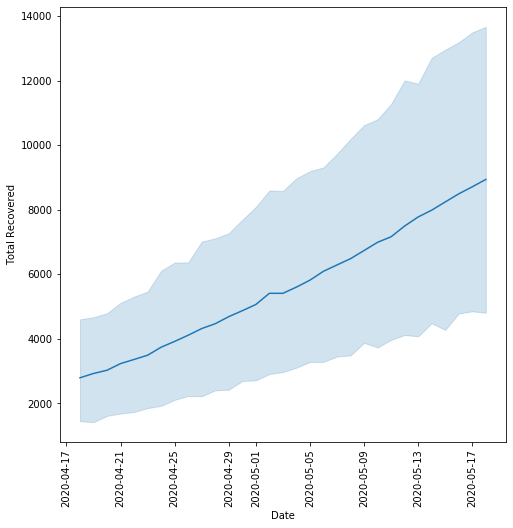

In [22]:
# plotting the graph to know the total Recovered trend with increase in date
plt.figure(figsize=(8,8))
sns.lineplot(x="Date",y="Total Recovered",data=dc)
plt.xticks(rotation=90)
plt.show()

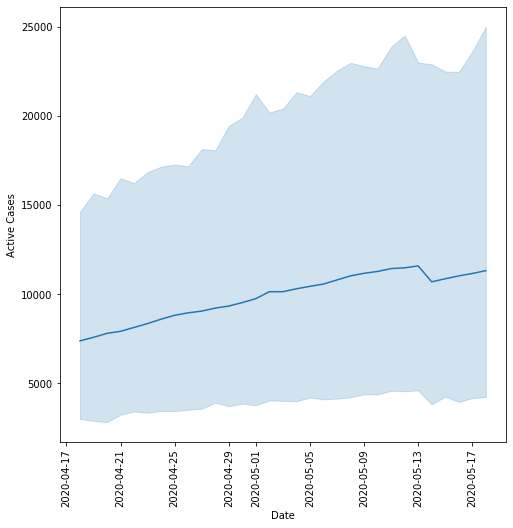

In [23]:
# plotting the graph to know the total active case trend with increase in date
plt.figure(figsize=(8,8))
sns.lineplot(x="Date",y="Active Cases",data=dc)
plt.xticks(rotation=90)
plt.show()

# Plotting the graph of top 10 countries with  deaths,cases,recovered,active case

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


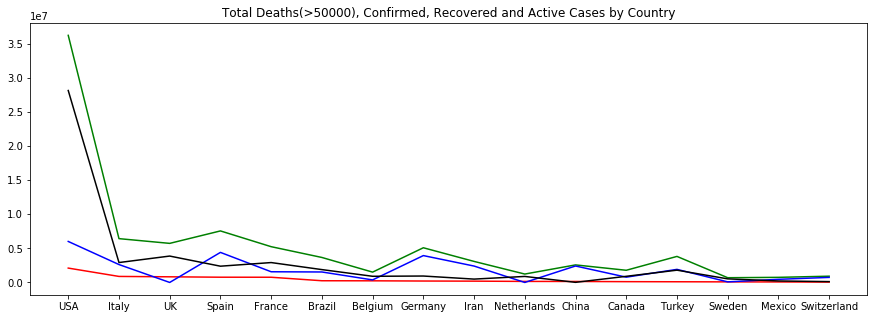

In [24]:
r_data = dc.groupby(["Country"])["Total Deaths", "Total Cases", "Total Recovered", "Active Cases"].sum().reset_index()
r_data = r_data.sort_values(by='Total Deaths', ascending=False)
r_data = r_data[r_data['Total Deaths']>50000]
plt.figure(figsize=(15, 5))
plt.plot(r_data['Country'], r_data['Total Deaths'],color='red')
plt.plot(r_data['Country'], r_data['Total Cases'],color='green')
plt.plot(r_data['Country'], r_data['Total Recovered'], color='blue')
plt.plot(r_data['Country'], r_data['Active Cases'], color='black')
 
plt.title('Total Deaths(>50000), Confirmed, Recovered and Active Cases by Country')
plt.show()

__Obervations:__
- USA has maximum deaths 
- recovered rate is good for USA but in UK the recovered case is less then deaths so its not good sign for UK
- USA has still maximum active cases left

In [25]:
#using groupby function to group country
datan = dc.groupby(["Country"])["Total Deaths", "Total Cases", "Total Recovered", "Active Cases"].sum().reset_index()
datan = datan.sort_values(by='Total Deaths', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [26]:
#new dataset with total deaths,total recovered and active cases
datan

,Country,Total Deaths,Total Cases,Total Recovered,Active Cases
201,USA,2102393.0,36196503.0,6004896.0,28115408.0
98,Italy,881699.0,6416833.0,2621286.0,2915063.0
200,UK,825478.0,5723955.0,0.0,3864943.0
180,Spain,767305.0,7547975.0,4401203.0,2380836.0
69,France,761760.0,5239029.0,1565154.0,2912277.0
...,...,...,...,...,...
66,Falkland Islands,0.0,391.0,337.0,54.0
67,Fiji,0.0,556.0,361.0,195.0
71,French Polynesia,0.0,1811.0,1450.0,361.0
150,Papua New Guinea,0.0,244.0,118.0,126.0


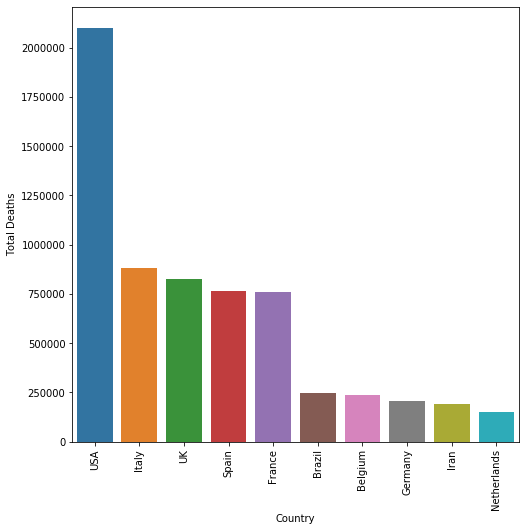

In [27]:
#graph of top 10 country of deaths
plt.figure(figsize=(8,8))
sns.barplot(x="Country",y="Total Deaths",data=datan.head(10))
plt.xticks(rotation=90)
plt.show()

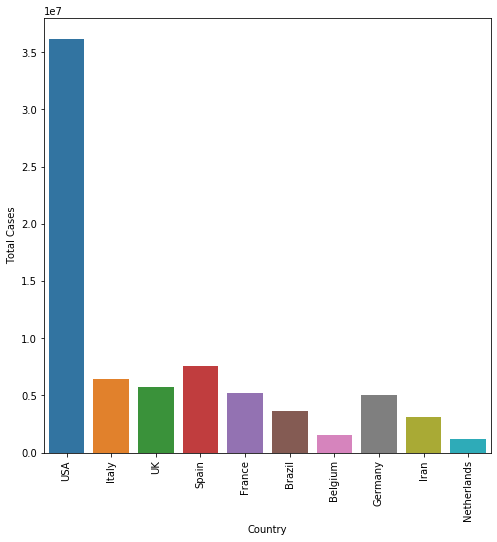

In [28]:
#graph of top 10 country of total cases

plt.figure(figsize=(8,8))
sns.barplot(x="Country",y="Total Cases",data=datan.head(10))
plt.xticks(rotation=90)
plt.show()

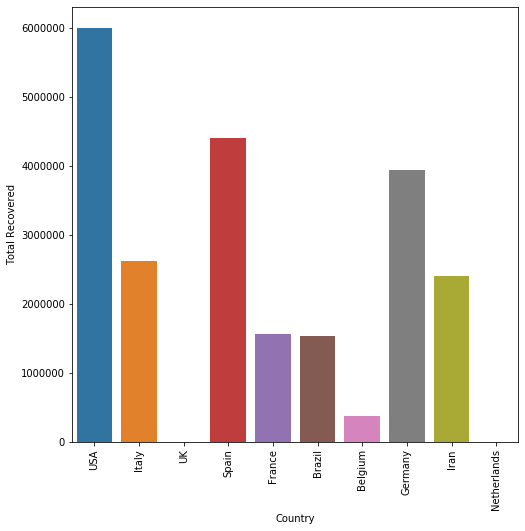

In [29]:
#graph of top 10 country of total Recovered

plt.figure(figsize=(8,8))
sns.barplot(x="Country",y="Total Recovered",data=datan.head(10))
plt.xticks(rotation=90)
plt.show()

__Observations:__
- USA is top in every cases wether its is about recovery or death or active cases
- corona has major impact on country USA

In [30]:
#setting index again in order
datan=datan.reset_index(drop=True)

In [31]:
datan

,Country,Total Deaths,Total Cases,Total Recovered,Active Cases
0,USA,2102393.0,36196503.0,6004896.0,28115408.0
1,Italy,881699.0,6416833.0,2621286.0,2915063.0
2,UK,825478.0,5723955.0,0.0,3864943.0
3,Spain,767305.0,7547975.0,4401203.0,2380836.0
4,France,761760.0,5239029.0,1565154.0,2912277.0
...,...,...,...,...,...
208,Falkland Islands,0.0,391.0,337.0,54.0
209,Fiji,0.0,556.0,361.0,195.0
210,French Polynesia,0.0,1811.0,1450.0,361.0
211,Papua New Guinea,0.0,244.0,118.0,126.0


In [32]:
#age fraction data
da

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189000,0.657000,0.154000
1,Russia,0.176000,0.682000,0.142000
2,Spain,0.147000,0.659000,0.194000
3,Brazil,0.217000,0.697000,0.086000
4,UK,0.177000,0.638000,0.185000
...,...,...,...,...
208,St. Barth,0.276098,0.636109,0.087731
209,Western Sahara,0.276098,0.636109,0.087731
210,Anguilla,0.276098,0.636109,0.087731
211,Lesotho,0.354000,0.601000,0.045000


In [33]:
#now we will check the deaths with age 
da["Fraction age 0-14 years"]=da["Fraction age 0-14 years"]*datan["Total Deaths"]
da["Fraction age 15-64 years"]=da["Fraction age 15-64 years"]*datan["Total Deaths"]
da["Fraction age 65+ years"]=da["Fraction age 65+ years"]*datan["Total Deaths"]

In [34]:
da

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,397352.277,1381272.201,323768.522
1,Russia,155179.024,601318.718,125201.258
2,Spain,121345.266,543990.002,160142.732
3,Brazil,166505.185,534811.585,65988.230
4,UK,134831.520,486002.880,140925.600
...,...,...,...,...
208,St. Barth,0.000,0.000,0.000
209,Western Sahara,0.000,0.000,0.000
210,Anguilla,0.000,0.000,0.000
211,Lesotho,0.000,0.000,0.000


__Observations:__
- Since fraction age is most of 15-64 yrs so its most likey the deaths will also be more in these ages
- Deaths of age 15-64 is most and then of age 0-14 and then age above 65